<a href="https://colab.research.google.com/github/pranav033-ctrl/Pnuenmonia-Detection-Using-CNN-based-Pre-trained-Models/blob/main/AI%20Project%20Multiclass%20Classification%20MobileNet_acc_97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
 ! mkdir ~/.kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ppranav033","key":"f79e5cd731b148c905630224eed90f8b"}'}

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                      2022 Ukraine Russia War                            2KB  2022-04-17 17:33:07           8894        495  1.0              
datasets/muratkokludataset/date-fruit-datasets                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39            872        203  0.9375           
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36             62        182  0.9375           
datasets/kamilpytlak/personal-key-indicators-of-heart-disease  Personal Key Indi

In [7]:
!kaggle datasets download -d ppranav033/covidpneumonia1

 99% 521M/526M [00:13<00:00, 41.3MB/s]
100% 526M/526M [00:13<00:00, 42.0MB/s]


In [15]:
! unzip covidpneumonia1.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Train/Normal/Normal-7766.png  
  inflating: Data/Train/Normal/Normal-7767.png  
  inflating: Data/Train/Normal/Normal-7769.png  
  inflating: Data/Train/Normal/Normal-777.png  
  inflating: Data/Train/Normal/Normal-7770.png  
  inflating: Data/Train/Normal/Normal-7771.png  
  inflating: Data/Train/Normal/Normal-7772.png  
  inflating: Data/Train/Normal/Normal-7773.png  
  inflating: Data/Train/Normal/Normal-7774.png  
  inflating: Data/Train/Normal/Normal-7775.png  
  inflating: Data/Train/Normal/Normal-7777.png  
  inflating: Data/Train/Normal/Normal-7778.png  
  inflating: Data/Train/Normal/Normal-7779.png  
  inflating: Data/Train/Normal/Normal-778.png  
  inflating: Data/Train/Normal/Normal-7780.png  
  inflating: Data/Train/Normal/Normal-7781.png  
  inflating: Data/Train/Normal/Normal-7782.png  
  inflating: Data/Train/Normal/Normal-7783.png  
  inflating: Data/Train/Normal/Normal-7784.png  
  inflating: Data/Tr

In [16]:
!pwd

/content


In [17]:
import tensorflow
import pandas as pd
import numpy as np
import os
import keras
from tensorflow.keras.applications import DenseNet169, DenseNet121, MobileNet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

In [18]:
base_model = MobileNet(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [19]:
training_dir='./Data/Train/'
validation_dir='./Data/Valid/'
test_dir='./Data/Test/'

In [21]:
test_ds = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(224, 224),
    )

Found 1569 files belonging to 3 classes.


In [22]:
train_ds = image_dataset_from_directory(
    directory=training_dir,
    shuffle=True,
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(224, 224),
    )

Found 12346 files belonging to 3 classes.


In [23]:
validation_ds = image_dataset_from_directory(
    directory=validation_dir,
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(224, 224),
    )

Found 1708 files belonging to 3 classes.


In [24]:
data_augmentation = tensorflow.keras.Sequential([
  tensorflow.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tensorflow.keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

In [25]:
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
x=base_model.output

x= data_augmentation(x)
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.6)(x)
# x= Dense(1024,activation='relu')(x) 
x= Dense(512,kernel_regularizer=regularizers.l2(0.0001), activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.6)(x)

preds=Dense(3,activation='softmax')(x)

In [27]:
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [28]:
# for layer in model.layers[:-8]:
#     layer.trainable=False

# for layer in model.layers[-8:]:
#     layer.trainable=True

In [29]:
base_model.trainable = False

In [30]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [31]:
len(model.trainable_variables)

8

In [32]:
initial_epochs = 20

In [33]:
history=model.fit(x=train_ds,
                           validation_data=validation_ds,
                           epochs=initial_epochs,
                           verbose=1)

Epoch 1/20
772/772 [==============================] - 44s 41ms/step - loss: 1.2327 - accuracy: 0.6021 - val_loss: 0.4953 - val_accuracy: 0.8419
Epoch 2/20
772/772 [==============================] - 31s 40ms/step - loss: 0.8524 - accuracy: 0.7228 - val_loss: 0.4469 - val_accuracy: 0.8554
Epoch 3/20
772/772 [==============================] - 31s 40ms/step - loss: 0.7204 - accuracy: 0.7589 - val_loss: 0.4232 - val_accuracy: 0.8607
Epoch 4/20
772/772 [==============================] - 31s 40ms/step - loss: 0.6458 - accuracy: 0.7815 - val_loss: 0.4126 - val_accuracy: 0.8612
Epoch 5/20
772/772 [==============================] - 31s 40ms/step - loss: 0.5881 - accuracy: 0.7988 - val_loss: 0.3972 - val_accuracy: 0.8718
Epoch 6/20
772/772 [==============================] - 31s 40ms/step - loss: 0.5657 - accuracy: 0.8020 - val_loss: 0.3863 - val_accuracy: 0.8741
Epoch 7/20
772/772 [==============================] - 31s 40ms/step - loss: 0.5351 - accuracy: 0.8131 - val_loss: 0.3800 - val_accuracy:

In [34]:
score = model.evaluate(test_ds, verbose = 1) 

99/99 [==============================] - 4s 36ms/step - loss: 0.3037 - accuracy: 0.9069


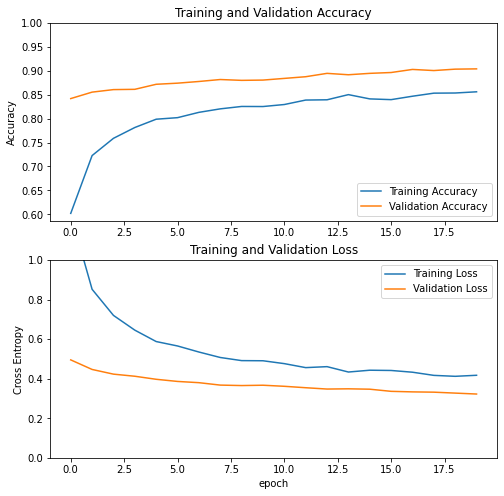

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [36]:
base_model.trainable = True

In [37]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 42

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  86


In [38]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
len(model.trainable_variables)

50

In [45]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 20/40
772/772 [==============================] - 42s 54ms/step - loss: 0.1034 - accuracy: 0.9866 - val_loss: 0.1526 - val_accuracy: 0.9690
Epoch 21/40
772/772 [==============================] - 48s 61ms/step - loss: 0.1013 - accuracy: 0.9886 - val_loss: 0.1584 - val_accuracy: 0.9690
Epoch 22/40
772/772 [==============================] - 36s 46ms/step - loss: 0.0999 - accuracy: 0.9874 - val_loss: 0.1608 - val_accuracy: 0.9690
Epoch 23/40
772/772 [==============================] - 36s 46ms/step - loss: 0.0952 - accuracy: 0.9898 - val_loss: 0.1532 - val_accuracy: 0.9725
Epoch 24/40
772/772 [==============================] - 35s 45ms/step - loss: 0.0957 - accuracy: 0.9894 - val_loss: 0.1489 - val_accuracy: 0.9713
Epoch 25/40
772/772 [==============================] - 36s 47ms/step - loss: 0.0947 - accuracy: 0.9902 - val_loss: 0.1448 - val_accuracy: 0.9772
Epoch 26/40
772/772 [==============================] - 36s 46ms/step - loss: 0.0945 - accuracy: 0.9896 - val_loss: 0.1466 - val_ac

In [41]:
score = model.evaluate(test_ds, verbose = 1) 

99/99 [==============================] - 3s 33ms/step - loss: 0.1311 - accuracy: 0.9771


In [42]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

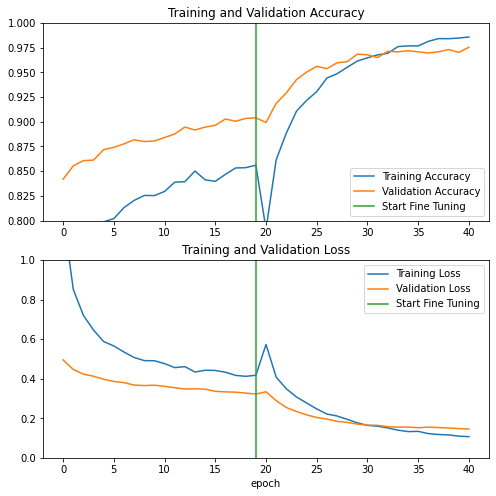

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [48]:
model.save('/')

INFO:tensorflow:Assets written to: /assets
